In [106]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join('..')))
from src import *
from itertools import product

import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [37]:
#@njit
def centered_probabilities(states):
    half_L = states.shape[1] // 2
    out = np.full_like(states, 0.0, dtype = np.float64)
    for i, state in enumerate(states):
        probs = np.abs(state, dtype = np.float64)
        centre = np.argmax(probs)
        out[i, :] = np.roll(probs, half_L-centre)
    return out

In [95]:
def produce_data(p, L, realizations):
    data = np.zeros(L)
    for _ in range(realizations):
        ness_correlation = C_NESS(0, 0, A(L, p))
        _, eigenvectors = np.linalg.eig(ness_correlation)
        centered_probs = centered_probabilities(eigenvectors.T)
        data += np.mean(centered_probs, axis = 0)
    return data / realizations

In [94]:
L = 1000
ps = [1.0, 2.0, 3.0, 5.0, 7.0]
realizations = 100

In [97]:
data = collect(map(lambda p: produce_data(p, L, realizations), ps))

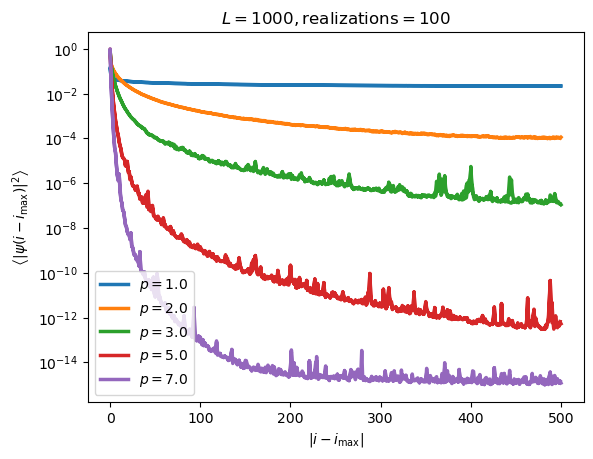

In [105]:
fig, ax = plt.subplots()
for i, d in enumerate(data):
    ax.plot(np.abs(np.arange(L) - L/2), d, linewidth=2.5, 
            label = r"$p = {}$".format(ps[i]))
ax.set_xlabel(r"$|i-i_\mathrm{max}|$")
ax.set_ylabel(r"$\left\langle|\psi(i-i_\mathrm{max})|^2\right\rangle$")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title(r'$L = 1000, \mathrm{realizations} = 100$')
ax.legend()
plt.show()
